In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error


**Step - 1** : *Load the Data*

In [6]:
df = pd.read_csv('weather.csv')

**Step - 2** : *Data Exploration*

In [7]:
print(df.head())
print(df.info())
print(df.describe())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

**Step - 3** : *Data Visualization*

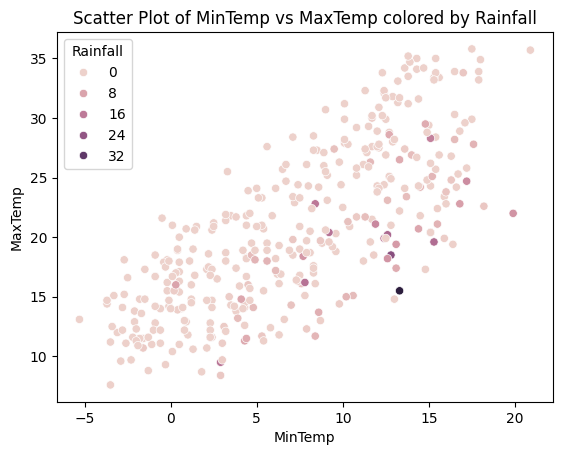

In [8]:
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='Rainfall')
plt.title('Scatter Plot of MinTemp vs MaxTemp colored by Rainfall')
plt.show()

**Step - 4** : *Data Analysis*

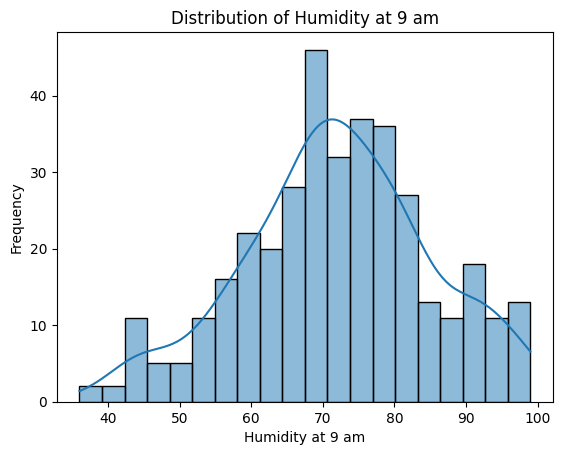

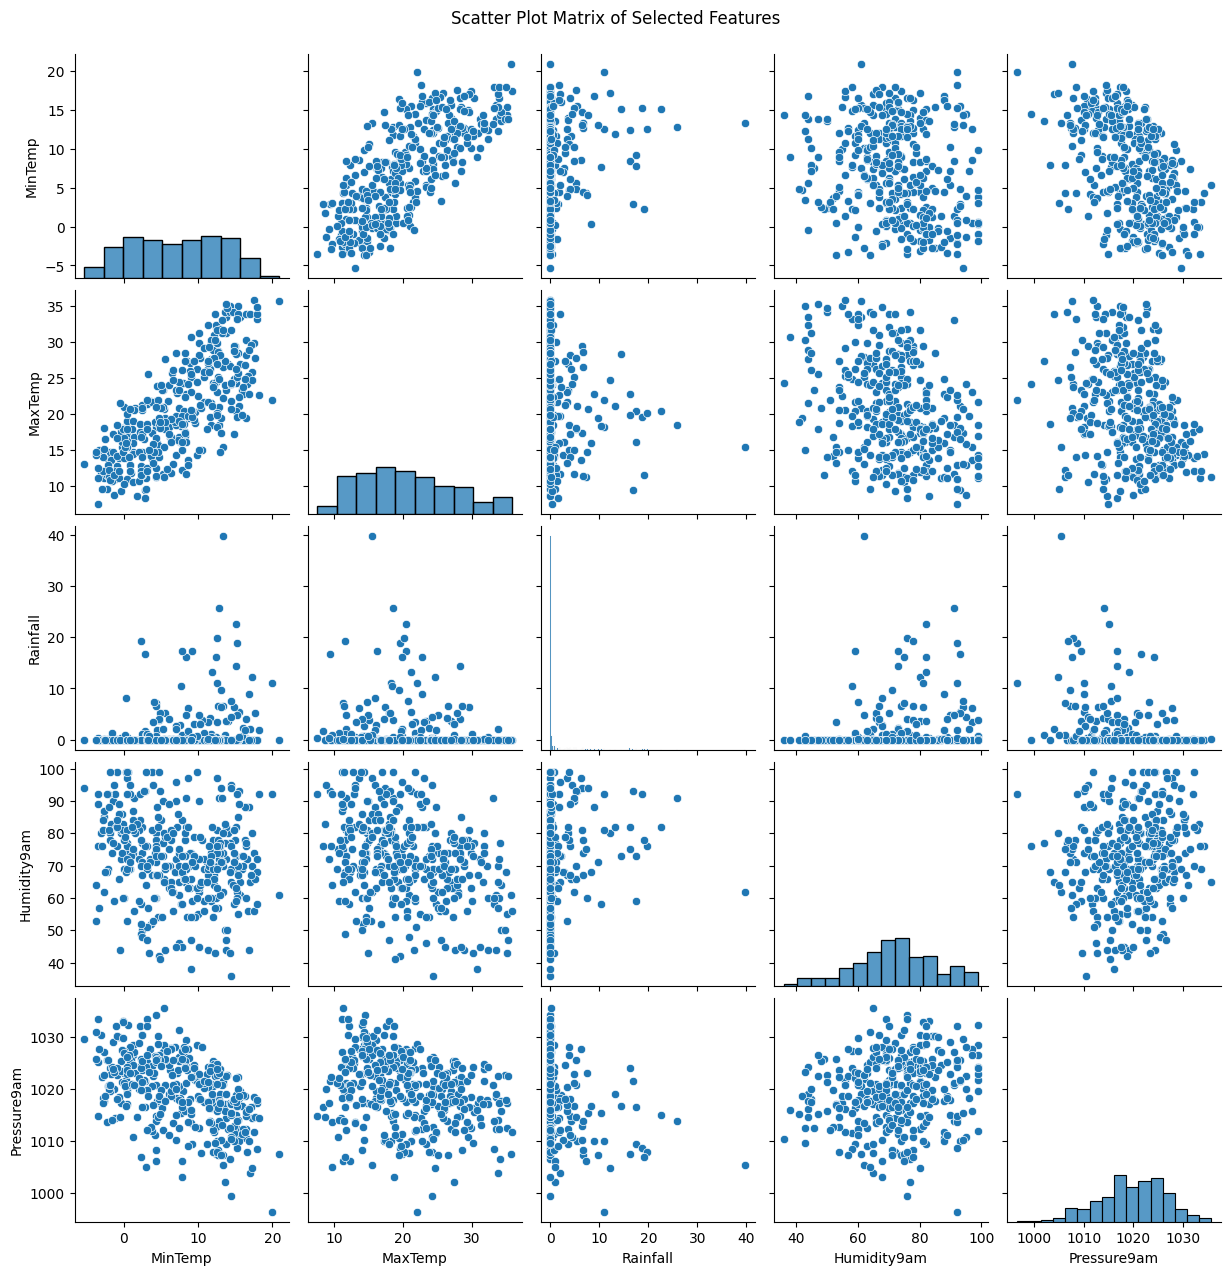

In [9]:
sns.histplot(df['Humidity9am'], bins=20, kde=True)
plt.title('Distribution of Humidity at 9 am')
plt.xlabel('Humidity at 9 am')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationships between selected features using a scatter plot matrix
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Pressure9am']
sns.pairplot(df[selected_features])
plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
plt.show()

**Step - 5** : *Data Visualization(Part 2)*

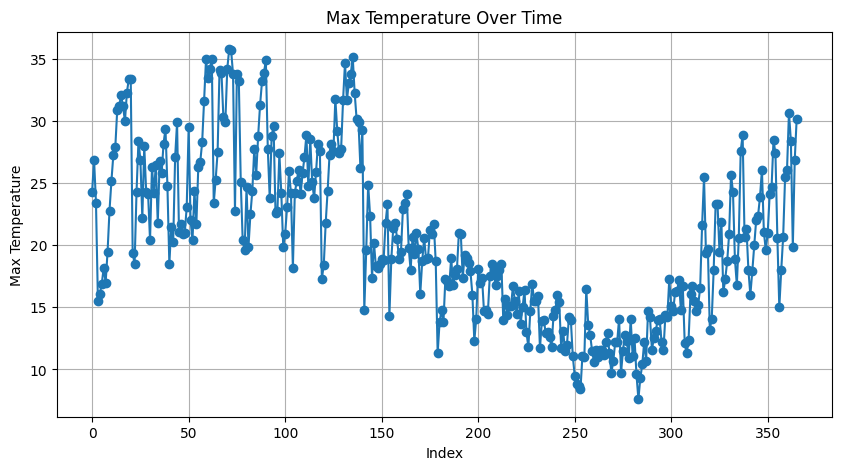

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['MaxTemp'], marker='o')
plt.xlabel('Index')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Over Time')
plt.grid(True)
plt.show()

**Step - 6** : *Advanced Analysis (e.g., predict Rainfall)*

In [14]:
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')
print(f'Mean Absolute Error for Rainfall Prediction: {mae}')

Mean Squared Error for Rainfall Prediction: 35.646352623003
Mean Absolute Error for Rainfall Prediction: 2.7090891891891893


**Step -  7** : *Conclusions and Insights*

In [15]:
# Identify the highest and lowest rainfall months
highest_rainfall_index = df['Rainfall'].idxmax()
lowest_rainfall_index = df['Rainfall'].idxmin()
print(f'Highest rainfall index: {highest_rainfall_index}, Lowest rainfall index: {lowest_rainfall_index}')

Highest rainfall index: 3, Lowest rainfall index: 0
